# LDA on Pokemon Data Set - Aditya - GCD - Term 4

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [LDA](#section4)<br>
5. [Machine Learning Models](#section5)<br>
6. [Conclusion](#section6)<br>


<a id = section1></a>

## 1. Problem Statement

Given the dataset containing __Pokemon Data__, use LDA to classify the pokemon types.
We are going to build a model to make predictions about the type of the Pokemon(eg: grass type, water type) and whether the Pokemon is legendary or not.

## 2. Data Loading and Description

This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. 

The columns in this dataset are:

    name            : 	The English name of the Pokemon
    japanese_name   :   The Original Japanese name of the Pokemon
    pokedex_number  : 	The entry number of the Pokemon in the National Pokedex
    percentage_male : 	The percentage of the species that are male. Blank if the Pokemon is genderless.
    type1           : 	The Primary Type of the Pokemon
    type2           : 	The Secondary Type of the Pokemon
    classification  : 	The Classification of the Pokemon as described by the Sun and Moon Pokedex
    height_m        :	Height of the Pokemon in metres
    weight_kg       :	The Weight of the Pokemon in kilograms
    capture_rate    :	Capture Rate of the Pokemon
    base_egg_steps  : 	The number of steps required to hatch an egg of the Pokemon
    abilities       :	A stringified list of abilities that the Pokemon is capable of having
    experience_growth: 	The Experience Growth of the Pokemon
    base_happiness  : 	Base Happiness of the Pokemon
    against_?       :	Eighteen features that denote the amount of damage taken against an attack of a particular type
    hp              :	The Base HP of the Pokemon
    attack          :	The Base Attack of the Pokemon
    defense         :	The Base Defense of the Pokemon
    sp_attack       :	The Base Special Attack of the Pokemon
    sp_defense      :	The Base Special Defense of the Pokemon
    speed           :	The Base Speed of the Pokemon
    generation      :	The numbered generation which the Pokemon was first introduced
    is_legendary    :	Denotes if the Pokemon is legendary.


__Importing Packages__

In [569]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from scipy import stats
import squarify
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, normalize, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC, SVR

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### Importing the Dataset

In [570]:
pokemon_orig = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/pokemon.csv')
pokemon = pokemon_orig
pokemon_orig.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


<a id = section3></a>

## 3. Exploratory Data Analysis (Data Pre-processing and Cleaning also)

#### Check the shape of the dataset

In [571]:
pokemon.shape

(801, 41)

#### Check the columns present in the dataset

In [572]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

#### Check the info of the dataset

In [573]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

#### Basic EDA

Text(0,0.5,'number of pokemon')

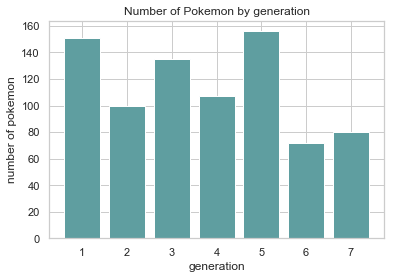

In [574]:
plt.bar(np.arange(7)+1, pokemon.groupby('generation')['name'].count(), color='cadetblue')
plt.title('Number of Pokemon by generation')
plt.xlabel('generation')
plt.ylabel('number of pokemon')

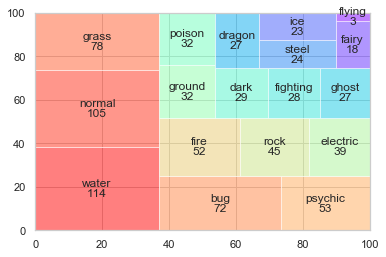

In [575]:
square = pokemon['type1'].value_counts() # Preparing subset of data for chart
squarify.plot(sizes=square.values, label=square.index, alpha=0.5, value=square.values)

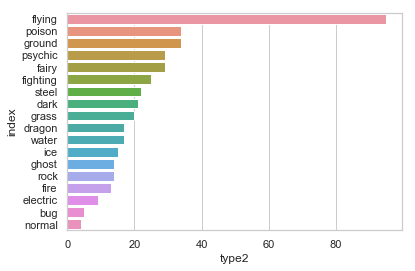

In [576]:
sns.barplot(x='type2', y='index', data = pokemon['type2'].value_counts().reset_index())

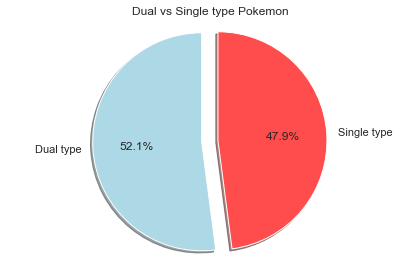

In [577]:
single_types = []
dual_types = []

count = 0
for i in pokemon.index:
    if(pd.isnull(pokemon.type2[i]) == True):
        count += 1
        single_types.append(pokemon.name[i])
    else:
        dual_types.append(pokemon.name[i])

data = [417, 384]
colors = ['lightblue', '#ff4c4c']

# Create a pie chart
plt.pie(data, 
        labels= ['Dual type', 'Single type'], 
        shadow=True, 
        colors=colors, 
        explode=(0, 0.15), 
        startangle=90, 
        autopct='%1.1f%%')

# View the plot drop above
plt.axis('equal')
plt.title('Dual vs Single type Pokemon')
# View the plot
plt.tight_layout()
plt.show()

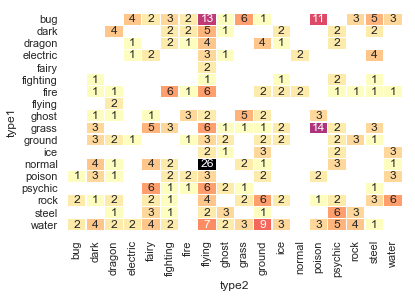

In [578]:
type_heat = pokemon[['type1','type2']] # Preparing subset of data for chart
type_heat['n'] = 1
type_heat = type_heat.groupby(['type1','type2'], as_index=True)['n'].count().unstack()
sns.heatmap(type_heat, annot=True, cmap=plt.cm.magma_r, cbar=False, linewidths=0.3)

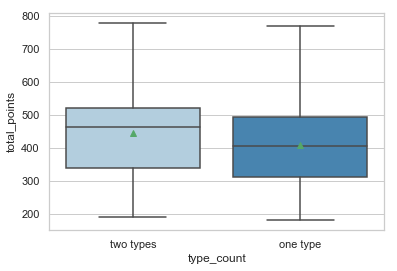

In [579]:
pokemon['type_count'] = ~pokemon['type2'].isnull() # Preparing subset of data for chart
pokemon['type_count'] = pokemon['type_count'].map({True:'two types',False:'one type'})
pokemon['total_points']=pokemon['hp']+pokemon['attack']+pokemon['defense']+pokemon['speed']+pokemon['sp_attack']+pokemon['sp_defense']
sns.boxplot(x='type_count', y='total_points', data=pokemon, showfliers=False, showmeans=True, palette='Blues')

#### Check the missing values present in the dataset and replace them appropriately. 

In [580]:
pokemon.isnull().sum()[pokemon.isnull().sum() !=0]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

In [581]:
dataset_clean=pokemon
dataset_clean.fillna(pokemon.mean(),inplace=True)
pokemon = dataset_clean
pokemon.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type_count,total_points
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,two types,318
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,two types,405
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,122,120,80,grass,poison,100.0,1,0,two types,625
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,60,50,65,fire,NaN,8.5,1,0,one type,309
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,80,65,80,fire,NaN,19.0,1,0,one type,405


#### Drop unnecessary columns. 

In [582]:
features=pokemon.drop(['japanese_name','name','percentage_male','pokedex_number','type2','classfication'],axis=1)

In [583]:
corr=features.corr('pearson')
abs(corr['is_legendary']).sort_values(ascending=False)

is_legendary         1.000000
base_egg_steps       0.873488
total_points         0.485440
base_total           0.485440
base_happiness       0.413108
sp_attack            0.406281
weight_kg            0.390001
experience_growth    0.361038
sp_defense           0.343241
height_m             0.319678
speed                0.311639
hp                   0.308405
attack               0.303295
defense              0.265587
against_ghost        0.170746
generation           0.139029
against_dark         0.136315
against_psychic      0.106047
against_grass        0.070826
against_flying       0.062214
against_fight        0.059132
against_fairy        0.050165
against_normal       0.034761
against_bug          0.027864
against_poison       0.024349
against_electric     0.023151
against_water        0.020679
against_rock         0.017588
against_dragon       0.014844
against_ground       0.012812
against_fire         0.011073
against_ice          0.005580
against_steel        0.001397
Name: is_l

In [584]:
pokemon=features.drop(['against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight','against_fire','against_flying','against_ghost','against_grass','against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel','against_water', 'type_count', 'total_points'],axis=1)

In [585]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 17 columns):
abilities            801 non-null object
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null object
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             801 non-null float64
hp                   801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
type1                801 non-null object
weight_kg            801 non-null float64
generation           801 non-null int64
is_legendary         801 non-null int64
dtypes: float64(2), int64(12), object(3)
memory usage: 106.5+ KB


In [586]:
#pokemon.is_legendary.replace((0, 1), ('False', 'True'), inplace=True)
pokemon.head()

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,49,1059860,0.7,45,65,65,45,grass,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,63,1059860,1.0,60,80,80,60,grass,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,123,1059860,2.0,80,122,120,80,grass,100.0,1,0
3,"['Blaze', 'Solar Power']",52,5120,70,309,45,43,1059860,0.6,39,60,50,65,fire,8.5,1,0
4,"['Blaze', 'Solar Power']",64,5120,70,405,45,58,1059860,1.1,58,80,65,80,fire,19.0,1,0


## Some actual EDA on the data set to understand more

In [587]:
pokemon_orig.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,total_points
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391,428.377029
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,26.576015,18.980069,231.373075,32.353826,27.942501,28.907662,107.979179,1.930420,0.282583,119.203577
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000,180.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.300000,2.000000,0.000000,320.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,28.500000,4.000000,0.000000,435.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,80.000000,55.155761,601.000000,91.000000,90.000000,85.000000,61.500000,5.000000,0.000000,505.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000,780.000000


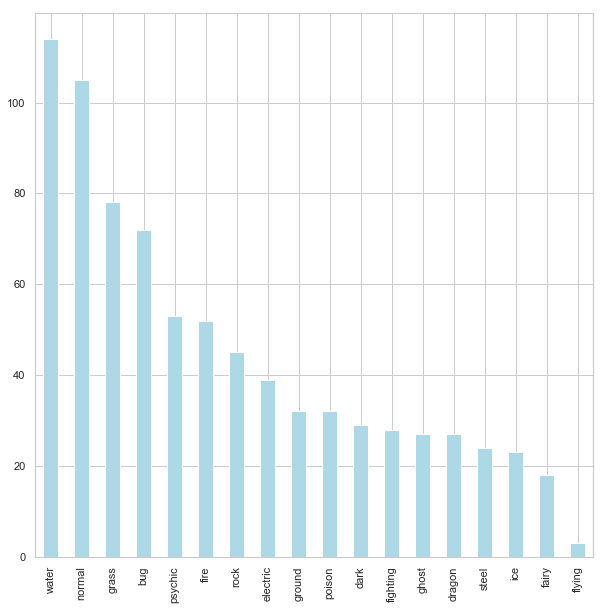

In [588]:
pokemon_orig['type1'].value_counts().plot(kind='bar', color='lightblue',figsize=(10,10))

The different types of pokemon that are present in our dataset are visible clearly. 
Water Pokemon seems to be a favourite choice because the dataset has a lot of water type Pokemon. 
There are very few flying type Pokemon. 

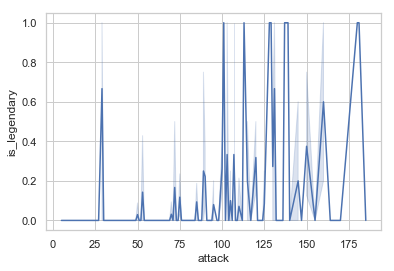

In [589]:
ax = sns.lineplot(x="attack", y="is_legendary", data=pokemon_orig)

This shows us that legendary Pokemon have higher values of attack when compared to normal pokemon. Most of the legendary pokemon have values of attack more than 100 units. So this graph helps us understand the influence of attack values on the target. This can be of help for picking out the right features in our dataset.

### Attribute Variations among Pokemon generations

Text(0.5,1,'Attribute variation between Pokemon generations')

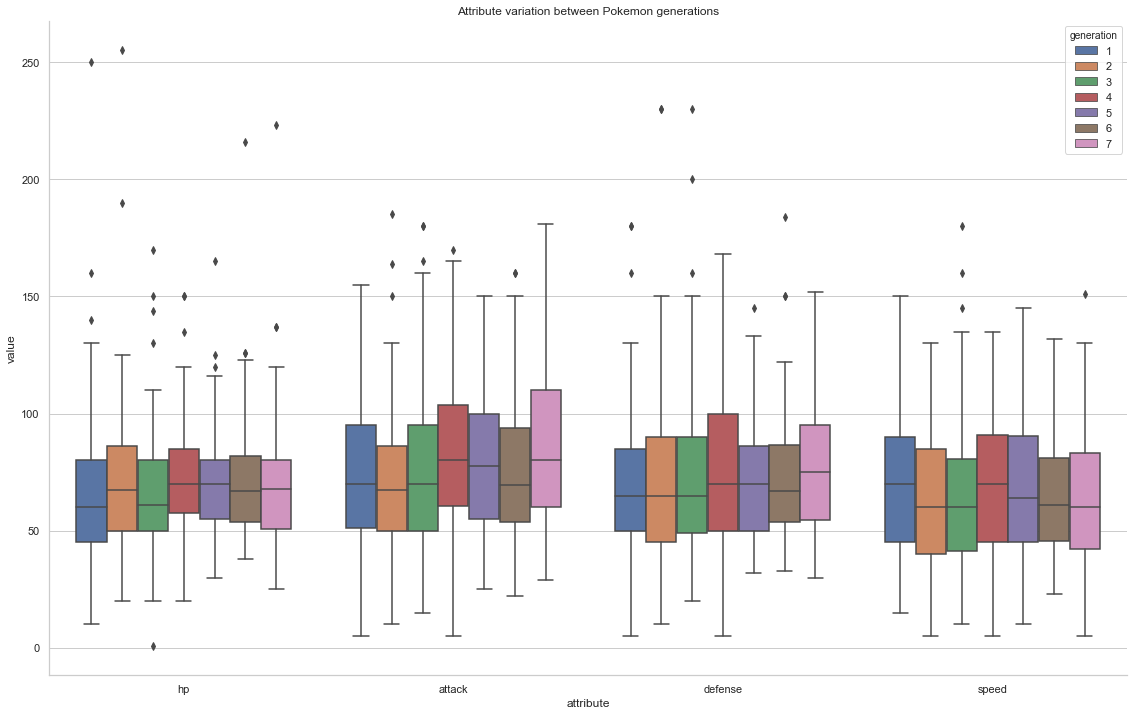

In [590]:
df1 = pokemon.loc[:,('hp','generation')]
df2 = pokemon.loc[:,('attack','generation')]
df3 = pokemon.loc[:,('defense','generation')]
df4 = pokemon.loc[:,('speed','generation')]

df1['attribute'] = 'hp'
df1.rename(columns={'hp': 'value'}, inplace=True)

df2['attribute'] = 'attack'
df2.rename(columns={'attack': 'value'}, inplace=True)

df3['attribute'] = 'defense'
df3.rename(columns={'defense': 'value'}, inplace=True)

df4['attribute'] = 'speed'
df4.rename(columns={'speed': 'value'}, inplace=True)

frames = [df1, df2, df3, df4]

result = pd.concat(frames)

sns.factorplot(kind='box',        # Boxplot
               y='value',         # Y-axis - values for boxplot
               x='attribute',     # X-axis - first factor
               hue='generation',  # Second factor denoted by color
               data=result,# Dataframe 
               size=10,           # Figure size (x100px)      
               aspect=1.6,        # Width = size * aspect 
               legend_out=False)  # Make legend inside the plot
plt.title('Attribute variation between Pokemon generations')

### Pokemon strengths analysis

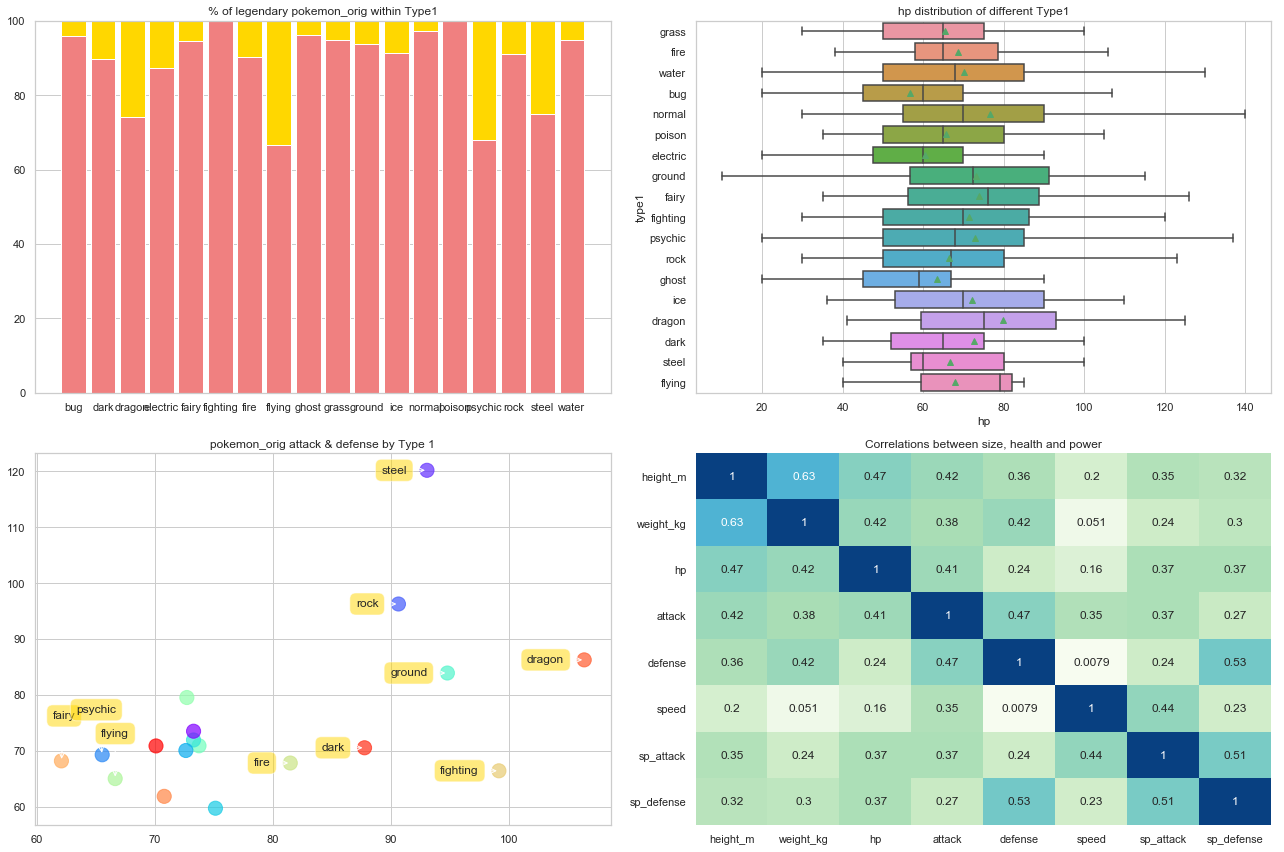

In [591]:
fig, ax = plt.subplots(2,2, figsize=(18,12))

######## ax[0,0] Legendary pokemon_orig within different types
legendary = pokemon_orig.groupby(['type1','is_legendary'])['name'].count().unstack() # creating subset data for chart
legendary = legendary.fillna(0)

legendary.columns = ['not_legend','legend']
n = pokemon_orig['type1'].nunique()

totals = [i+j for i,j in zip(legendary['not_legend'], legendary['legend'])] # counting total for each 'type1'
legend = [i / j * 100 for i,j in zip(legendary['legend'], totals)] # calculating % of legend in each 'type1'
not_legend = [i / j * 100 for i,j in zip(legendary['not_legend'], totals)] # calculating % of non-legend in 'type1'

width = 0.85
ax[0,0].bar(np.arange(n), not_legend, color='lightcoral', edgecolor='white', width=width)
ax[0,0].bar(np.arange(n), legend, bottom=not_legend, color='gold', edgecolor='white', width=width)
ax[0,0].set_xticks(np.arange(n))
ax[0,0].set_xticklabels(np.sort(pokemon_orig['type1'].unique()))
ax[0,0].set_title('% of legendary pokemon_orig within Type1')

######## ax[0,1] hp distribution among type1
sns.boxplot(x='hp', y='type1', data=pokemon_orig, showfliers=False, showmeans=True, ax=ax[0,1])
ax[0,1].set_title('hp distribution of different Type1')

######## ax[1,0] attack & defense of pokemon_orig based on type1
att_def = pokemon_orig.groupby('type1')[['attack','defense','hp']].mean() # creating subset data for chart

labels_max = att_def.sort_values(by='attack', ascending=False).head(7) # find label for top 7 types for attack
labels_min = att_def.sort_values(by='attack', ascending=True).head(3) # find label for last 3 types for attack
label_high = labels_max.index.tolist()
label_low = labels_min.index.tolist()

ax[1,0].scatter(x=att_def['attack'], y=att_def['defense'],s=200,label=att_def.index, alpha=0.7)

for label, x, y in zip(label_high, labels_max['attack'], labels_max['defense']):
    ax[1,0].annotate(
        label, xy=(x, y), xytext=(-20, -5), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, a, b in zip(label_low, labels_min['attack'], labels_min['defense']):
    ax[1,0].annotate(
        label, xy=(a, b), xytext=(14, 40), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1,0].set_title('pokemon_orig attack & defense by Type 1')

######## ax[1,1] Correlations between size, health and power
power = pokemon_orig[['height_m','weight_kg','hp','attack','defense','speed','sp_attack','sp_defense']]
sns.heatmap(power.corr(), annot=True, cmap='GnBu', ax=ax[1,1], cbar=False)
ax[1,1].set_title('Correlations between size, health and power')

plt.tight_layout()
plt.show()

### Pokemon battle analysis

Note: Figures indicates amount of damage taken against a particular type, with 1 being normal amount of damage


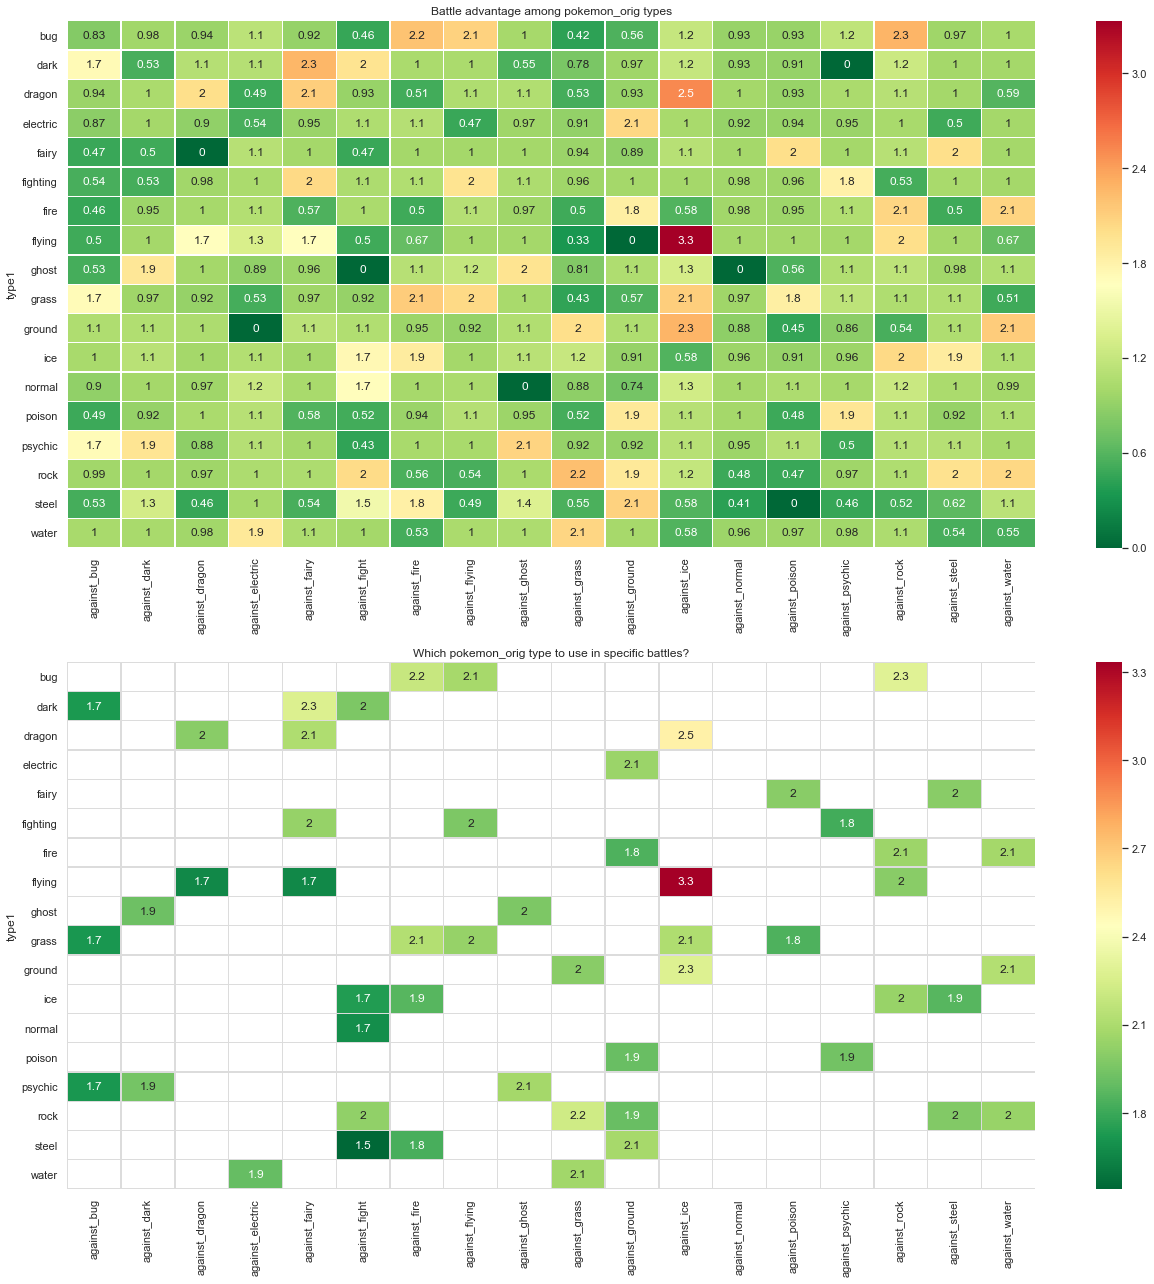

In [592]:
against = pokemon_orig.iloc[:,1:19] # creating subset data for chart
against = pd.concat([pokemon_orig[['type1','type2']],against], axis=1)
against['type2'].loc[against['type2'].isnull()]='None'
against['type_combo'] = against['type1']+'-'+against['type2']

fig, ax = plt.subplots(2,1,figsize=(18,18))

sns.heatmap(against.groupby('type1').mean(), cmap='RdYlGn_r', annot=True, linewidths=0.3, fmt='.2g', ax=ax[0])
ax[0].set_title('Battle advantage among pokemon_orig types')

selection = against.groupby('type1').mean()
sns.heatmap(selection.mask(selection<=1.5, np.nan),linewidths=0.3, cmap='RdYlGn_r', annot=True, fmt='.2g', linecolor='gainsboro', ax=ax[1])
ax[1].set_title('Which pokemon_orig type to use in specific battles?')

print('Note: Figures indicates amount of damage taken against a particular type, with 1 being normal amount of damage')
plt.tight_layout()
plt.show()

## EDA Conclusions

General Observations

1. Generation 1, 3 and 5 have relatively higher number of Pokemon introduced
2. The most common pokemon types are water, normal, grass and bug.
3. Water Pokemon seems to be a favourite choice because the dataset has a lot of water type Pokemon. 
4. There are very few flying type Pokemon.
5. Most pokemon only have a primary type but only 52% of pokemon have both primary and secondary abilities (e.g. primary: bug, secondary: flying)
6. normal + flying, grass + poison, bug + flying and bug + poison are the most common type 1&2 combination
7. The legendary Pokemon have higher values of attack when compared to normal pokemon. Most of the legendary pokemon have values of attack more than 100 units.

Pokemon Strength related Observations

1. dragon, flying, psychic and steel have relatively larger percentage of legendary pokemon
2. ghost, electric and bug pokemon tend to have lower hp whereas fairy and flying pokemon types tend to have higher hp
3. On average, dragon type has the highest attack and steel type has significantly higher defense
4. With reference to the combination of attack and defense:
    a. dragon, steel, rock and ground are among the strongest pokemon type
    b. fairy, psychic and flying are among the weakest pokemon type
5. There is no strong linear correlation between pokemon size (height & weight) to hp, attack and defense



<a id = section4></a>

## 4. LDA

In [593]:
# Applying LDA only on pokemon where type2 is present
df = pokemon_orig[pokemon_orig['type2'].isnull()].loc[:, ['sp_attack', 'sp_defense', 'attack', 'defense', 'speed', 'hp', 'type1']]
X = df.iloc[:, :-1].values
X_norm = normalize(X)
y = df.iloc[:, -1].values

In [594]:
df.head()

,sp_attack,sp_defense,attack,defense,speed,hp,type1
3,60,50,52,43,65,39,fire
4,80,65,64,58,80,58,fire
6,50,64,48,65,43,44,water
7,65,80,63,80,58,59,water
8,135,115,103,120,78,79,water


In [595]:
lda = LDA(n_components=3)
lda.fit(X_norm, y)

LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

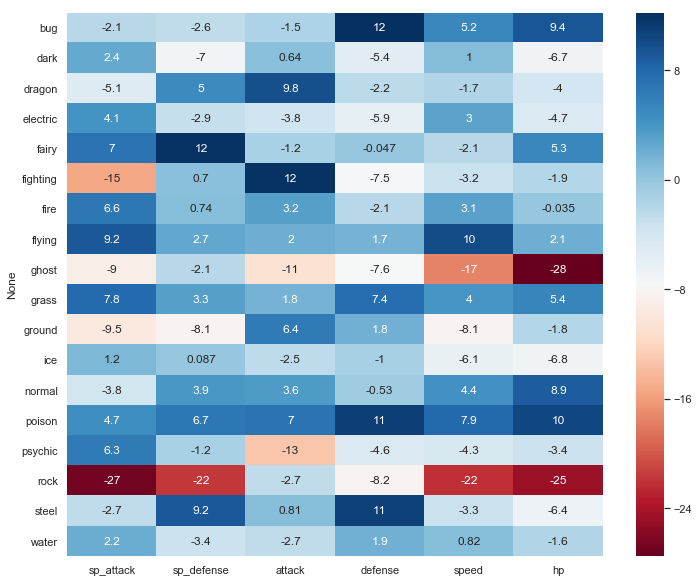

In [596]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(pd.DataFrame(lda.coef_, 
                         columns=df.columns[:-1], 
                         index=[lda.classes_]), 
            ax=ax, cmap='RdBu', annot=True)

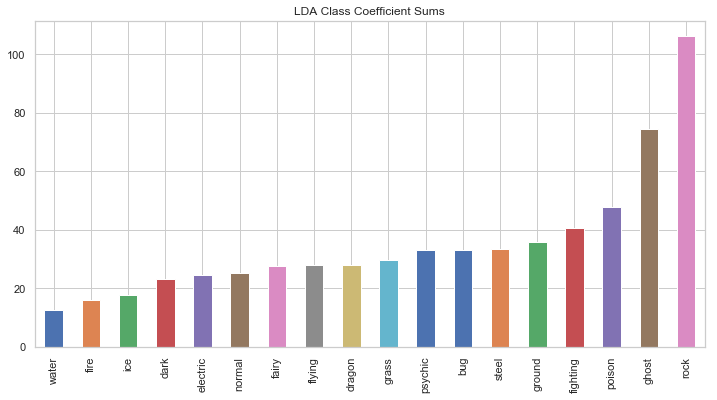

In [597]:
pd.Series(np.abs(lda.coef_).sum(axis=1), index=lda.classes_).sort_values().plot.bar(figsize=(12, 6), title="LDA Class Coefficient Sums")

In [598]:
lda.explained_variance_ratio_

array([0.48036548, 0.21001446, 0.13047873])

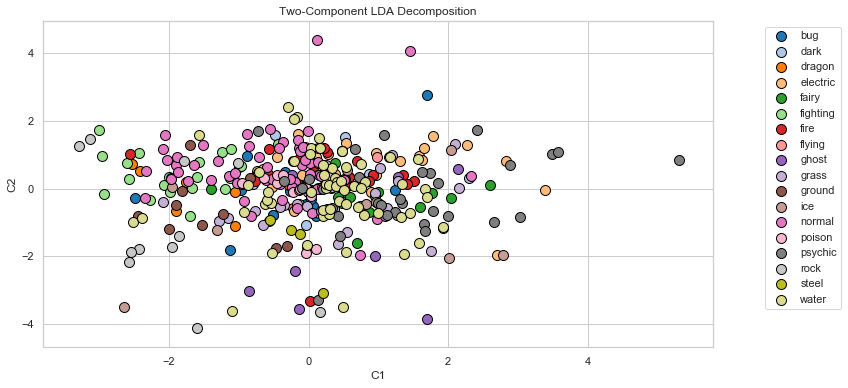

In [599]:
X_hat = lda.fit_transform(X, y)

import matplotlib as mpl

colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories
ret = pd.DataFrame(
    {'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))}
)

fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (ret
         .query('Type == @cat')
         .plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                       s=100, edgecolor='black', linewidth=1,
                       title='Two-Component LDA Decomposition')
         .legend(bbox_to_anchor=(1.2, 1))
    )

<a id = section5></a>

## 5. Machine learning models

## 5.1 PCA

In [600]:
pokemon.head()

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,49,1059860,0.7,45,65,65,45,grass,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,63,1059860,1.0,60,80,80,60,grass,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,123,1059860,2.0,80,122,120,80,grass,100.0,1,0
3,"['Blaze', 'Solar Power']",52,5120,70,309,45,43,1059860,0.6,39,60,50,65,fire,8.5,1,0
4,"['Blaze', 'Solar Power']",64,5120,70,405,45,58,1059860,1.1,58,80,65,80,fire,19.0,1,0


#### Preparing X and y using pandas

In [630]:
ability=[]
for i in features['abilities']:
    x = i[1:-2]    
    x = x.replace("'","")
    x = x.replace(" ", "")
    y = x.split(',')    
    ability.append(y)

In [631]:
df = pd.DataFrame(
    {'abilities':
        ability
    }, columns=['abilities'])
transform_df = df['abilities']
mlb = MultiLabelBinarizer()
X=pd.DataFrame(mlb.fit_transform(transform_df),columns=mlb.classes_, index=df.index)

In [632]:
target=pokemon['type1']
target_type=target.astype("category").cat.codes
target_type=np.array(target_type)

In [633]:
pca = PCA()
features1 = pca.fit_transform(X)
pca = PCA(n_components=10)  
features1 = pca.fit_transform(features1)

In [634]:
features1=pd.DataFrame(features1)

In [635]:
features2= pd.DataFrame(pokemon.iloc[:,1:-16])
ft=pd.concat([features1,features2],axis=1)

In [607]:
ft=(ft-ft.min())/(ft.max()-ft.min())
ft=np.array(ft)

####  Spliting X and y into train and test dataset.

In [608]:
X_train, X_test, y_train, y_test = train_test_split(ft, target_type, test_size=0.2)

#### Checking the shape of X and y of train dataset

In [609]:
print(X_train.shape)
print(y_train.shape)

(640, 10)
(640,)


#### Checking the shape of X and y of test dataset

In [610]:
print(X_test.shape)
print(y_test.shape)

(161, 10)
(161,)


### Train and Test data for legendary pokemon prediction

In [611]:
feature_legendary=(ft-ft.min())/(ft.max()-ft.min())
feature_legendary=np.array(feature_legendary)

In [612]:
target_legendary=pd.DataFrame(pokemon['is_legendary'])
target_legendary=np.array(target_legendary)

In [613]:
X_train_l,X_test_l,y_train_l,y_test_l=train_test_split(feature_legendary,target_legendary, test_size=0.2)

### 5.1.1 KNN with PCA for type prediction

In [614]:
knn = KNeighborsClassifier(n_neighbors=2,weights='distance',algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [615]:
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.5652173913043478


In [616]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

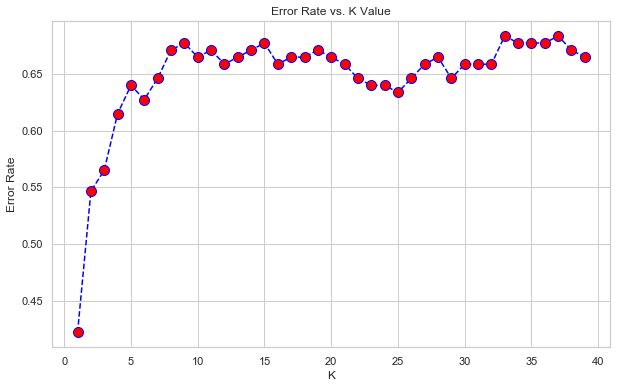

In [617]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### 5.1.2 KNN with PCA for legendary pokemon prediction

In [618]:
knn = KNeighborsClassifier(n_neighbors=2,weights='distance',algorithm='brute')
knn.fit(X_train_l,y_train_l)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [619]:
pred_l = knn.predict(X_test_l)
print(accuracy_score(y_test_l, pred_l))

0.906832298136646


In [620]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

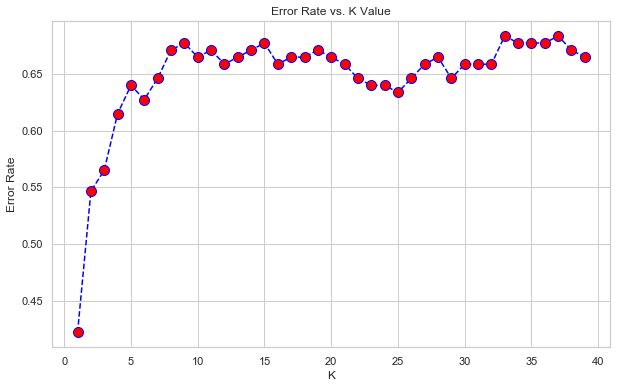

In [621]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## 5.2 LDA

In [622]:
pokemon.head()

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,49,1059860,0.7,45,65,65,45,grass,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,63,1059860,1.0,60,80,80,60,grass,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,123,1059860,2.0,80,122,120,80,grass,100.0,1,0
3,"['Blaze', 'Solar Power']",52,5120,70,309,45,43,1059860,0.6,39,60,50,65,fire,8.5,1,0
4,"['Blaze', 'Solar Power']",64,5120,70,405,45,58,1059860,1.1,58,80,65,80,fire,19.0,1,0


#### Preparing X and y using pandas

In [623]:
lda = LDA(n_components = 2,solver='eigen',shrinkage='auto')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#### Checking the shape of X and y of train dataset

In [624]:
print(X_train.shape)
print(y_train.shape)

(640, 2)
(640,)


#### Checking the shape of X and y of test dataset

In [625]:
print(X_test.shape)
print(y_test.shape)

(161, 2)
(161,)


### Train and Test data for legendary pokemon prediction

In [626]:
lda = LDA(n_components = 2)
X_train_l = lda.fit_transform(X_train_l, y_train_l)
X_test_l = lda.transform(X_test_l)

### 5.2.1 KNN with LDA for type prediction

In [627]:
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)

# Calculate distance from a given point to all other points
# and keep track of the respective classes for those distances
# and eventually return sorted list of distances
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances

# Get the "n" defined neighbours from a list of sorted distances
def get_neighbours(distances, count):
    return distances[:count]

# Takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 15)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key=op.count)
    return prediction

# Get how accurate our system is based on a new set of test points
# for which we already know the right answer to
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [628]:
accuracy(X_train,y_train,X_test,y_test)

'Accuracy: 22.981366459627328%'

### 5.2.2 KNN with LDA for legendary pokemon prediction

In [629]:
accuracy(X_train_l,y_train_l,X_test_l,y_test_l)

'Accuracy: 90.06211180124224%'

<a id = section501></a>

## 6 Conclusion

1. PCA doesnt seem to have much impact due to the lesser number of components and less variance.
2. The optimal number of neighbors for using in KNN algo is 3.
3. The accuracy of KNN model is 93%.
4. SVC Model (SVM) seems to be having higher accuracy for training set but for test data it is only 90%.

KNN Model seems to be better for predicting as far as this data set is considered.